## 计算机算术 | Computer Arithmetic

在数值计算中，系统性地出现两种误差来源：
1. 截断误差（Truncation errors）
    - 由于数学模型的简化（例如，离散化、用有限差分代替导数）所致。
2. 舍入误差（Rounding errors）
    - 由于在计算机中无法精确表示实数所致
    > it is impossible to represent real numbers exactly in a computer

---

### 数值计算 | Numerical Computation

> 使用计算机近似求解数学问题的方法。
>
> The use of computers to approximate solutions to mathematical problems.

例如求解微分方程、优化问题或积分计算。由于许多数学问题无法得到解析解（即精确的公式解），我们依赖数值方法（如迭代算法或离散化）来获得近似解。
> Many mathematical problems lack analytical solutions (i.e., exact formula-based solutions), so we rely on numerical methods (e.g., iterative algorithms or discretization) to obtain approximate results.

然而，这些方法不可避免地引入误差，主要分为**截断误差**和**舍入误差**。

#### 1. 截断误差（Truncation Errors）

> 源于对数学模型的简化或近似处理。
> 
> Arise from the simplification or approximation of mathematical models.

在数值计算中，我们经常将连续问题（如微分方程）转换为离散问题（如差分方程），以便计算机处理。
> In numerical computation, we often convert continuous problems (e.g., differential equations) into discrete problems (e.g., difference equations) to make them computable.

这种转换会丢失一些信息，导致误差。

> 截断误差通常与步长或近似阶数相关。
>
> Truncation errors are typically related to step size or approximation order.

#### 2. 舍入误差（Rounding Errors）

> 由于计算机无法精确表示所有实数所致。
>
> Computers cannot represent all real numbers exactly.

计算机使用有限位数的二进制表示数字（如浮点数标准 IEEE 754），这导致某些数字（如无理数或循环小数）必须被舍入到最接近的可表示值。

> 舍入误差是系统性的，可能在迭代算法中累积，导致结果偏离真实值。
>
> Rounding errors are systematic and can accumulate in iterative algorithms, causing results to deviate from true values.


---

## Integers Arithmetic | 整数算术

In Python integers can be arbitrarily large.<br>
The interpreter simply uses as many bits as needed to represent the number.

In [2]:
a = 1
a.bit_length()

1

In [3]:
a = 10 ** 100
a.bit_length()

333

In [4]:
a = 10 ** 30003
a.bit_length()

99668

NumPy 不兼容 Python 的可扩展整数
> Numerical packages such as NumPy are not compatible with this extensible integer type

核心：NumPy 的核心设计目标（高速的批量数组运算）与 Python 可变长整数带来的开销和不确定性存在根本性冲突。

NumPy 使用固定数量的比特位来存储整数，通常是 32 位（np.int32）或 64 位（np.int64，默认值）。<br>
超出最大取值范围的运算会产生溢出（超出固定范围的比特位被截断）。
> NumPy uses a fixed number of bits to store integers, usually 32 bits (np.int32) or 64 bits (np.int64, default).<br>
> Computations outside the maximum range of values generate overflows (truncation of the bits outside the fixed range).


In [5]:
import numpy as np

In [6]:
print(np.iinfo(np.int64))

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



---

## Floating-point Arithmetic | 浮点数算术

In a computer, a real number $x\ne 0$ is represented as:
$$
x = \pm n \times b^e
$$
- $\pm$：符号位（Sign）
  - `0`代表正数，`1`代表负数。
- $n$：尾数/有效数字（Mantissa/Significand）
  - 数字的精度部分。
  - 一个规范化的小数（fractional part），通常满足：$$1 \le n < b$$
- $b = 2$：基数（The base）
  - 通常是 `2`（二进制）
- $e$：指数（The exponent）
  - 决定了数的范围（数量级）。

<img src="./image/float_binary.png" alt="image.png" style="width: 700px; height: auto; display: block; margin: 0 auto;"><br>

<img src="./image/float_16bits_demo.png" alt="image.png" style="width: 700px; height: auto; display: block; margin: 0 auto;">


---

In [7]:
print(0.1 + 0.1 + 0.1 == 0.3)

False


In [8]:
print(0.1)
print(format(0.1, ".50g"))

0.1
0.1000000000000000055511151231257827021181583404541


In [9]:
(0.1).as_integer_ratio()

(3602879701896397, 36028797018963968)

In [10]:
print(3602879701896397 / 36028797018963968)

0.1


---

For real numbers, Python uses 64 bits:

It can represent real numbers from $\pm\mathbf{2.23\times10^{-308}}$ to $\pm\mathbf{1.80\times10^{308}}$

- If $x$ is smaller than $m=2.23\times10^{-308}$, we get an ***underflow***
- If $x$ is greater than $M=1.80\times10^{308}$, we get an ***overflow***


In [11]:
print(np.finfo(np.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



---

### 机器精度 | Machine Precision

机器精度是满足 $\text{float}(1 + \epsilon_1) > 1$ 的最小正数 $\varepsilon_1$。
> The machine precision of a floating point arithmetic is defined as the smallest positive number $\varepsilon_1$ such that $\text{float}(1 + \epsilon_1) > 1$


In [12]:
print(np.spacing(1))

2.220446049250313e-16


`np.space(1)`: 
- 在浮点数系统中，表示比 $x$ 大的、最邻近 $x$ 的那个数，与 $x$ 本身之间的绝对差值。
- In the floating-point system, the absolute difference between $x$ and the next largest representable floating-point number.

> 在 $x$ 这个位置，浮点数之间的“最小步长”或“绝对间隔”<br>
> the "minimum step size" or the "absolute interval" between floating-point numbers at the location $x$.

在计算机中，由于用有限的内存（通常是64位）来表示无限多的实数，所以浮点数在数轴上的分布是离散的，而不是连续的。<br>
数字越大，相邻两个可表示的浮点数之间的“间隔”就越大。

> In computing, because we use a finite amount of memory (typically 64 bits) to represent an infinite set of real numbers, floating-point numbers are discrete on the number line, not continuous. <br>
> The larger the number, the larger the "gap" or "interval" between two adjacent representable floating-point numbers.

#### 金融数值计算的实际意义

处理大金额时需要格外小心：如果你计算1亿美金（$10^8$）的期权价格，绝对精度间隔是：

```
ε ≈ 10⁸ × 1.57 × 10⁻¹⁶ ≈ 1.57 × 10⁻⁸ ≈ 0.0000000157
```

这意味着价格变化小于这个量级时可能被"淹没"。

- 算法稳定性分析：在设计数值算法时，必须考虑当前计算规模的精度限制。
- 变量缩放策略：有时需要将问题缩放到"单位量级"附近进行计算，以最大化精度。

---

### 不等间距网格

**浮点数精度的根本性质：绝对误差随着数值增大而线性增大。**

浮点数（在数轴上的分布不是均匀的，而是对数尺度的。）

- 在`0`附近，数字非常密集，间隔很小（例如，小数的精度高）。
- 随着数值变大，间隔逐渐变大（稀疏）（网格变粗糙）。

这是因为浮点数使用科学计数法：$(-1)^s \times m \times 2^e$
- $s$：符号位
- $m$：尾数
- $e$：指数，间隔由指数决定。

当指数`e`增加时，相邻数字之间的差值（即`np.spacing`）会乘以`2`的幂次。<br>


#### 金融工程含义

精度损失的风险分布不均匀
- 在价格接近0的资产（如深度虚值期权）计算中，相对精度较高
- 在大金额计算（如机构级交易）中，绝对误差可能显著放大
```py
# 不好的做法：直接处理极大数值
large_value = 1e8  # 1亿美元
result = large_value + 0.01  # 这个加法可能被"淹没"

# 更好的做法：缩放处理
scaled_value = 1.0  # 以百万为单位
result = scaled_value + 0.01/1e6  # 在单位尺度下计算
```

---

### 浮点数舍入：几何级数 | Float rounding: Geometric series

几何级数 $$\sum_{p=-10}^{10}10^p = (10^{10}-10^{-10})/9$$ 在数学上是精确的等式。这个级数包含从 $10^{-10}$ 到 $10^{10}$ 的`21`项。


In [13]:
print((10 ** 10 - 10 ** (-10)) / 9)

1111111111.1111112


1. 大数与小数的相减（相差`20`个数量级）
2. 精度丢失
    - 在64位浮点数中，当两个相差巨大的数相减时，较小数的有效数字会被舍入
3. 二进制表示限制
    - $10^{-10}$ 在二进制中是无限循环小数，无法精确表示

---

#### 高精度

decimal模块的优势:
- 任意精度计算
- 十进制表示，避免二进制舍入误差
- 精确处理极大和极小的数值

> 但是，和 Numpy 不兼容。<br>
> 计算速度较慢<br>
> 需要手动管理精度设置

In [14]:
from decimal import Decimal

In [15]:
a = Decimal(10)
b = Decimal(-10)
c = Decimal(9)
print((a ** a - a ** b) / c)

1111111111.1111111111


---

#### 求和顺序的重要性

$$
\Large
\text{从小到大求和产生更小舍入误差}
$$

> Summing from smaller to larger numbers generates less rounding error

In [16]:
total = 0.0
for p in range(10, -11, -1):  # 从大到小
    total += 10**p
# 舍入误差累积，小数值被大数"淹没"
print(total)

11111111111.11111


In [17]:
total = 0.0
for p in range(-10, 11):  # 从小到大
    total += 10**p
# 小数值先累加，减少舍入误差
print(total)

11111111111.11111


#### 浮点数使用建议

避免直接比较浮点数。

In [18]:
from math import isclose

In [19]:
isclose(0.1 + 0.1 + 0.1, 0.3, rel_tol = 1e-9, abs_tol = 0.0)
# rel_tol: 相对容差（默认1e-9）
# abs_tol: 绝对容差


True

---

## 数值微分 | Numerical differentiation

### 导数近似 | Approximation of derivatives

Let $f:\mathbb{R}\to\mathbb{R}$ be a continuous and differentiable real function, with continuous derivative $f^{(1)}$.

By definition, the derivative of $f$ at the point $x\in\R$ is defined by
$$
f^{(1)}(x):=\lim\limits_{h\to 0}\frac{f(x + h) - f(x)}{h}
$$

The derivative $f^{(1)}$ might be known explicitly if $f$ has a simple analytical form.
Nevertheless, most of the time the derivative $f^{(1)}$ is not known explicitly, and has to be approximated numerically.
> 大多数情况下，我们无法获得导数的解析表达式，只能通过数值方法近似。

One can obtain an approximation of $f^{(1)}$ by  considering "small" values for $h$ instead of letting it go to zero.

**Question: How to choose $h$ to get a good approximation of $f^{(1)}(x)$ when working with floating-point arithmetic?**

Suppose that $f$ can be differentiated $n + 1$ times.
Let $f^{(n)}$ be the n-th derivative.
The Taylor expansion of $f$ around $x$ reads
$$
f(x+h)=f(x)+hf^{(1)}(x)+\frac{h^2}{2}f^{(2)}(x)+\frac{h^3}{6}f^{(3)}(x)+\ldots+\frac{h^n}{n!}f^{(n)}(x)+\frac{h^{n+1}}{(n+1)!}f^{(n+1)}(\xi)
$$
where $\xi\in[x,x+h]$.
We know that $\xi$ exist but its exact value is not known.
A Taylor series approximates a function with a degree of precision equal to the remainder term $\frac{h^{n+1}}{(n+1)!}f^{(n+1)}(\xi)$

重新排列得到导数表达式：
$$
\frac{f(x+h) - f(x)}{h} = f^{(1)}(x) + \frac{h}{2}f^{(2)}(x) + \frac{h^2}{6}f^{(3)}(x) + \ldots
$$
误差分析
- $\color{red}\text{截断误差}$：来自忽略的高阶项 $(h/2)f''(x) + (h²/6)f'''(x) + ...$
- 当 $h$ 减小时：截断误差减小（因为高阶项含 $h$ 的幂次）


---


### 前向差分 | Forward difference

Consider a first-order Taylor expansion with exact remainder
$$
f(x+h)=f(x)+hf^{(1)}(x)+\frac{h^2}{2}f^{(2)}(\xi)
$$
with $\xi\in[x,x+h]$ from which we get
$$
\color{yellow}
f^{(1)}(x)=\frac{f(x+h)-f(x)}{\color{red}h}-\frac{\color{red}h}{2}f^{(2)}(\xi)
$$
This expression for $f^{(1)}(x)$ is composed of two parts: the approximation of the derivative and the truncation error.
This approximation is called forward-difference approximation.


- 需要计算：$f(x)$ 和 $f(x+h)$ 两个函数值
- 误差：与 $\color{red}h$ 成正比

---


### 后向差分 | Backward difference

Consider the alternative Taylor expansion
$$
f(x-h)=f(x)-hf^{(1)}(x)+\frac{h^2}{2}f^{(2)}(\xi)
$$
with $\xi\in[x-h,x]$ ($h$ was replaced by $-h$).
We get the approximation
$$
\color{yellow}
f^{(1)}(x)=\frac{f(x)-f(x-h)}{\color{red}h}+\frac{\color{red}h}{2}f^{(2)}(\xi)
$$
This is called the backward-difference approximation.


- 需要计算：$f(x)$ 和 $f(x-h)$ 两个函数值
- 误差：与 $\color{red}h$ 成正比

---


### 中心差分 | Centered difference（最优选择）

Consider the two Taylor expansions:
$$
f(x+h)=f(x)+hf^{(1)}(x)+\frac{h^2}{2}f^{(2)}(x)+\frac{h^3}{6}f^{(3)}(\xi_+)\quad\mathrm{with~}\xi_+\in[x,x+h]
$$
$$
f(x-h)=f(x)-hf^{(1)}(x)+\frac{h^2}{2}f^{(2)}(x)-\frac{h^3}{6}f^{(3)}(\xi_-)\quad\mathrm{with}\quad\xi_-\in[x-h,x]
$$
The difference between the two is equal to:
$$
f(x+h)-f(x-h)=2hf^{(1)}(x)+\frac{h^3}{6}(f^{(3)}(\xi_+)+f^{(3)}(\xi_-))
$$
If $f^{(3)}$ is continuous, then there exist $\xi\in[\xi_-,\xi_+]$, such that:
$$
f^{(3)}(\xi)=\frac{f^{(3)}(\xi_+)+f^{(3)}(\xi_-)}{2}
$$
This gives:
$$
\color{yellow}
f^{(1)}(x)=\frac{f(x+h)-f(x-h)}{\color{red}2 h}-\frac{\color{red}h^2}{6}f^{(3)}(\xi)
$$
This is called the centered-difference approximation of $f^{(1)}$.
It is more precise than both the forward difference and backward difference, since the truncation error is of order $\mathcal{O}(h^2)$


通过相减消去二阶误差项
- 需要计算：$f(x+h)$ 和 $f(x-h)$ 两个函数值
- 误差：与 $\color{red}h^2$ 成正比

---

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def f(x):
    return np.sin(x)  # 真实导数 f'(x) = cos(x)

def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
    return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

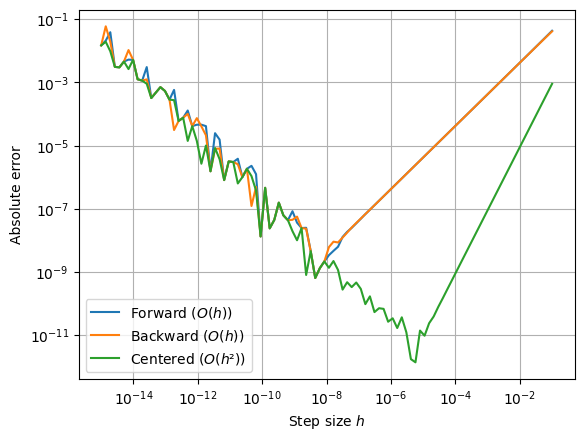

In [25]:
# 测试点
x0 = 1.0
true_derivative = np.cos(x0)  # 真实导数值

# 不同步长下的误差
h_values = np.logspace(-15, -1, 100)
errors_forward = []
errors_backward = []
errors_centered = []

for h in h_values:
    errors_forward.append(abs(forward_diff(f, x0, h) - true_derivative))
    errors_backward.append(abs(backward_diff(f, x0, h) - true_derivative))
    errors_centered.append(abs(centered_diff(f, x0, h) - true_derivative))

# 绘图显示误差随h的变化
plt.loglog(h_values, errors_forward, label='Forward ($O(h)$)')
plt.loglog(h_values, errors_backward, label='Backward ($O(h)$)')
plt.loglog(h_values, errors_centered, label='Centered ($O(h²)$)')
plt.xlabel('Step size $h$')
plt.ylabel('Absolute error')
plt.grid(True)
plt.legend()
plt.show()

### 如何选择 h | How to choose $h$

We want to choose $h$ as small as possible to reduce the **truncation error.**
However, we also need to consider the **rounding error.**

If $h$ is too small, we might get: `float(x + h) == float(x)`

If the function $f$ varies slowly: `float(f(x + h)) == float(f(x))`


---

Let $f_h^{(1)}(x)$ be the approximation of $f^{(1)}(x)$ using the mesh size $h$:

$$f_h^{(1)}(x)=\frac{f(x+h)-f(x)}{h}$$

If we suppose that $f^{(2)}$ is bounded for all $x$ in the domain of application:

$$|f^{(2)}(x)|\leq M$$

then we get the following bound for the truncation error $-\frac{\mathbf{h}}{2}\mathbf{f}^{(2)}(\xi)$：

$$|f_h^{(1)}(x)-f^{(1)}(x)|\leq\frac{h}{2}M$$

> $f_h$ 是一个近似。

---

The truncation error bound $\frac{hM}{2}$ suggests that we can reach any arbitrary precision by choosing $h$ sufficiently small.
However, in floating-point arithmetic it is not possible to evaluate $f_h^{(1)}(x)$ exactly, due to **float rounding errors.**

Suppose that the rounding error for evaluating $f(x)$ has the following bound:
> 假设计算 $f(x)$ 的舍入误差有以下界限

$$|\mathrm{float}(f(x))-f(x)|\leq\varepsilon$$

Then the rounding error for a **forward-difference** approximation is bounded by:
> 那么**前向差分**近似的舍入误差界限为：

$$\left|\mathrm{float}(f_h^{(1)}(x))-f_h^{(1)}(x)\right|=\left|\frac{\mathrm{float}\left(f(x+h)\right)-f(x+h)}{h}-\frac{\mathrm{float}(f(x))-f(x)}{h}\right|\leq\frac{2\varepsilon}{h}$$

> $|a - b|\le |a| + |b|$

Combining both error bounds, we obtain:

$$\left|\mathrm{float}\left(f_h^{(1)}(x)\right)-f^{(1)}(x)\right|\leq\frac{2\varepsilon}{h}+\frac{M}{2}h$$

> $|\text{float}(f_h^{(1)}(x)) - f_h^{(1)}(x) + f_h^{(1)}(x) - f^{(1)}(x)|$<br>
> $|a + b| \le |a| + |b|$

One needs to find a compromise between reducing the **truncation error** and reducing the **rounding error**
> 我们需要在减小截断误差和减小舍入误差之间找到折衷方案。

Note that $h$ can be represented without rounding error if we choose it as a power of 2.
> 如果我们将 $h$ 选择为 2 的幂，则它可以无舍入误差地表示。


---

We can minimize the bound（前向差分） $\color{yellow}b(h)=\frac{2\varepsilon}{h}+\frac{hM}{2}$（总误差） as a function of $h$:
> 理论最优 $h$

$$b^{(1)}(h)=-\frac{2\varepsilon}{h^2}+\frac{M}{2}=0\quad\Leftrightarrow\quad \color{red}\mathbf{h}=\mathbf{2}\sqrt{\frac{\varepsilon}{M}}$$

If we assume that $M$ is of order 1 and that $\varepsilon$ is the 64-bit machine precision $\varepsilon_1=2.22{\times}10^{-16}=2^{-52}$, we get:

$$\mathbf{h=2.98\times10^{-8}=2^{-25}}$$

---

For **centered difference**（中心差分） approximation, if we assume that $|f^{(3)}(x)|\leq M$ for all $x$ in the domain, the total error bound is $\color{yellow}b(h)=\frac{\varepsilon}{h}+\frac{h^2M}{6}$（总误差）
> 理论最优 $h$

$$b^{(1)}(h)=-\frac{\varepsilon}{h^2}+\frac{Mh}{3}=0\quad\Leftrightarrow\quad \color{red}\mathbf{h}=\left(\frac{3\varepsilon}{\mathbf{M}}\right)^{1/3}$$

If $M$ is of order 1 and $\varepsilon = \varepsilon_1$, we get:

$$\mathbf{h\approx8.7\times10^{-6}\approx1.14\times2^{-17}}$$


---

#### 金融工程实际意义

为什么中心差分更优？

- 允许使用更大的步长（$10^{-6}$ vs $10^{-8}$）
- 对舍入误差更不敏感
- 在实际计算中更稳定

---

#### 例子 | Example
